In [2]:
import pandas as pd
from glob import glob
import os
import matplotlib.pyplot as plt

# Merge monthly sales data into single file

In [3]:
jan = pd.read_csv('./Sales_Data/Sales_January_2019.csv')

#Reading all files 
#sales19 = glob('Sales_Data/*.csv')
files = [file for file in os.listdir('./Sales_Data')]  
all_files = pd.DataFrame()

#Merging all files into one file
#df_sales19 = pd.concat([pd.read_csv(f, delimiter=',') for f in sales19])
for file in files:
    df = pd.read_csv('./Sales_Data/'+file)
    all_files = pd.concat([all_files, df])

all_files.to_csv('allfiles.csv', index=False)    

## Read updated DataFrame

In [4]:
allfiles = pd.read_csv('allfiles.csv')

## Process Clean Up

In [5]:
#Check for NaN Values
nan_df = allfiles[allfiles.isna().any(axis=1)]
nan_df.head(100)

#Drop NaNRows
allfiles = allfiles.dropna(how='all')

#Fix the "OR" error upon converting orderdate into Month
allfiles = allfiles[allfiles['Order Date'].str[0:2] !='Or']

#COnvert column values to correct type
allfiles['Quantity Ordered'] = pd.to_numeric(allfiles['Quantity Ordered'])
allfiles['Price Each'] = pd.to_numeric(allfiles['Price Each'])


# Add Extra Columns

In [18]:
#Add Month Column
allfiles['Month'] =allfiles['Order Date'].str[0:2]
allfiles['Month'] =allfiles['Month'].astype('int32')

#Add Sales($$$) Column
allfiles['Sales'] = allfiles['Quantity Ordered'] * allfiles['Price Each']

# What was the best month for sales? How much was earned that month?

In [19]:
total_sales = allfiles.groupby('Month').sum()

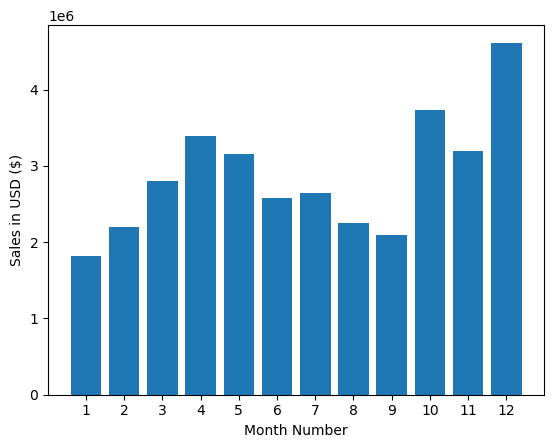

In [20]:
#Plot the results
months = range(1,13)

plt.bar(months,allfiles.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month Number')
plt.show()
